## Task
The task is to build a machine learning model that can lean from these features and accurately predict the species of iris flowers when given
new measurements.
* Setosa 
* Versicolor
* Virginica

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,accuracy_score

## Importing dataset

In [44]:
# load the csv data 
df = pd.read_csv("iris.csv")
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [45]:
# display basic stats of data
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [46]:
# display no. of samples on each class
df['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

## Preprocessing dataset

In [47]:
#check null values
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

## Data Analysis

<Axes: >

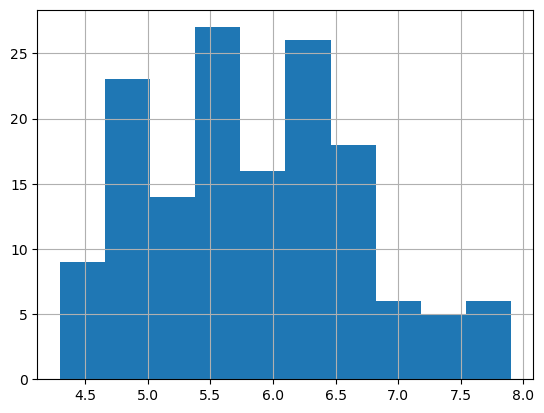

In [7]:
df['sepal_length'].hist()

<Axes: >

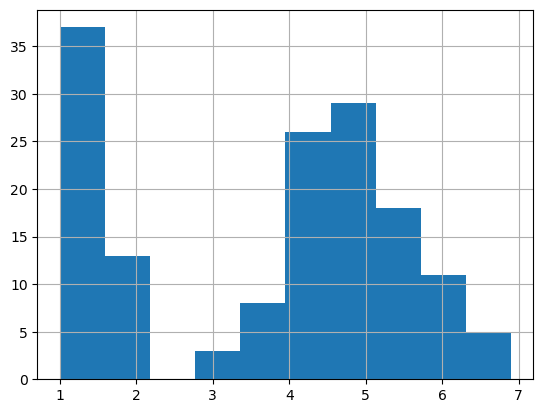

In [8]:
df['petal_length'].hist()

<Axes: >

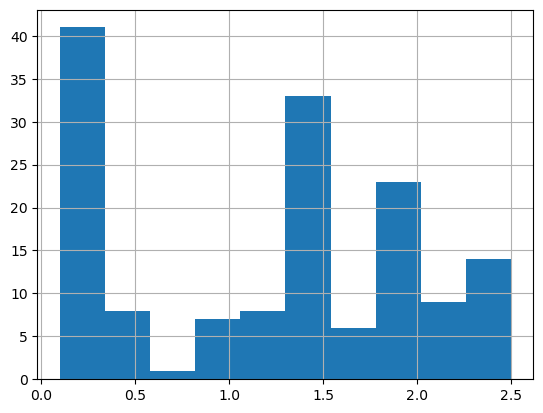

In [9]:
df['petal_width'].hist()

<Axes: >

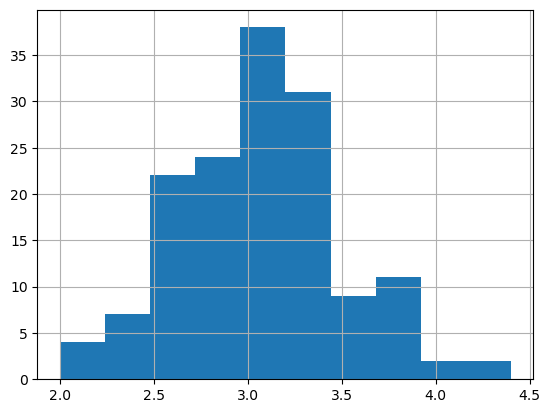

In [10]:
df['sepal_width'].hist()

In [48]:
# Create List of colors and class labels
colors = ['red','orange','blue']
species = ['virginica','versicolor','setosa']

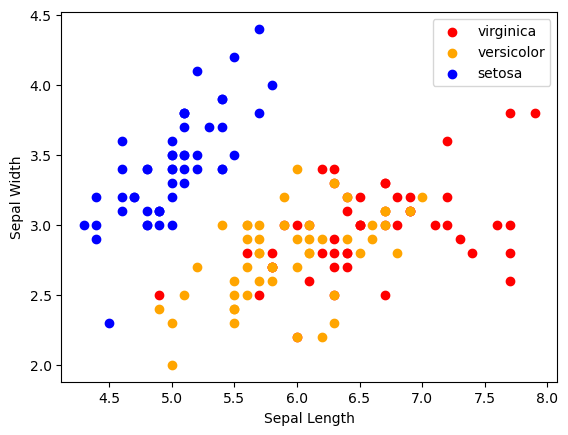

In [49]:
for i in range(3):
    #filter data on each class
    x = df[df['species']==species[i]]
    # plot the scatter plot
    plt.scatter(x['sepal_length'],x['sepal_width'],c=colors[i],label=species[i])
    
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

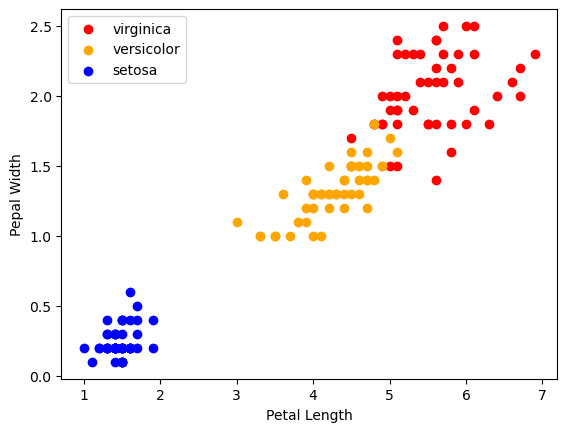

In [50]:
for i in range(3):
    #filter data on each class
    x = df[df['species']==species[i]]
    # plot the scatter plot
    plt.scatter(x['petal_length'],x['petal_width'],c=colors[i],label=species[i])
    
plt.xlabel("Petal Length")
plt.ylabel("Pepal Width")
plt.legend()

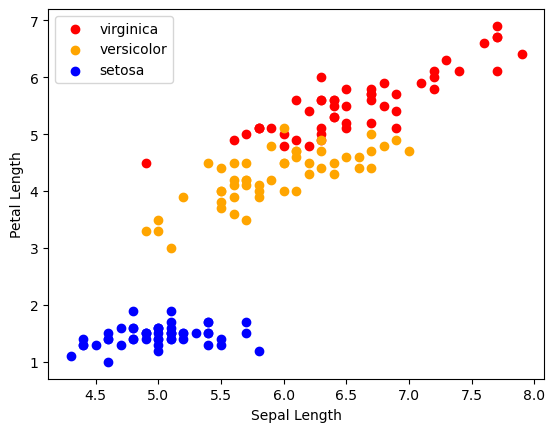

In [51]:
for i in range(3):
    #filter data on each class
    x = df[df['species']==species[i]]
    # plot the scatter plot
    plt.scatter(x['sepal_length'],x['petal_length'],c=colors[i],label=species[i])
    
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()

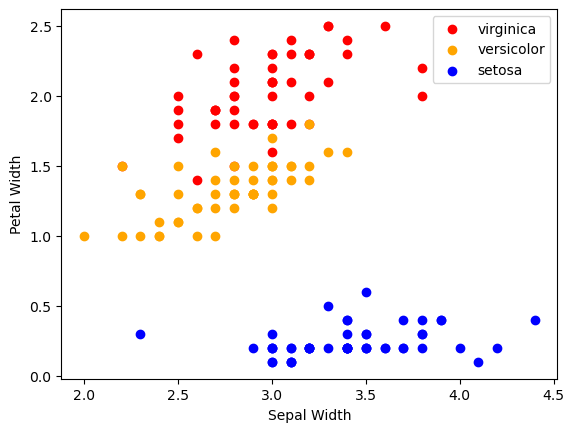

In [52]:
for i in range(3):
    #filter data on each class
    x = df[df['species']==species[i]]
    # plot the scatter plot
    plt.scatter(x['sepal_width'],x['petal_width'],c=colors[i],label=species[i])
    
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()

##  Correlation Matrix

In [53]:
# display the correlation matrix
df.corr()

C:\Users\Khan2\AppData\Local\Temp\ipykernel_5020\1587477840.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


C:\Users\Khan2\AppData\Local\Temp\ipykernel_5020\409277134.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

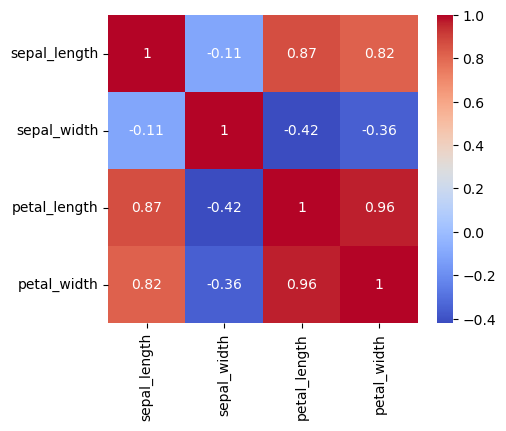

In [54]:
corr = df.corr()
# plot the heat map
fig,ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr,annot=True,ax=ax,cmap='coolwarm')


## Label Encoder

In [36]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# transform the string labels to integer
# df['species'] = le.fit_transform(df['species'])


## Model Training and Testing

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import pickle

# input data
x = df.drop(columns=['species'])
# output data
y = df['species']

# split the data for train and test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30)

In [20]:
# Logistic Regression
model = LogisticRegression()
model.fit(x_train,y_train)
print("Logistic Regression Accuracy: ",model.score(x_test,y_test)*100)

Logistic Regression Accuracy:  97.77777777777777


C:\Users\Khan2\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
# model training
model.fit(x_train.values,y_train.values)

C:\Users\Khan2\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
# print metric to get performance
print("Accuracy: ",model.score(x_test,y_test)*100)

Accuracy:  97.77777777777777


C:\Users\Khan2\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [56]:
# K-nearest neighbors
model = KNeighborsClassifier()
model.fit(x_train,y_train)
print("K-nearest neighbors Accuracy: ",model.score(x_test,y_test)*100)

K-nearest neighbors Accuracy:  93.33333333333333


In [57]:
model.fit(x_train.values,y_train.values)


KNeighborsClassifier()

In [58]:
# print metric to get performance
print("Accuracy: ",model.score(x_test.values,y_test.values)*100)

Accuracy:  93.33333333333333


In [59]:
import pickle 
pickle.dump(model,open('saved_model.pkl','wb'))

In [26]:
# Decision Tree
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
print("Decision Tree Accuracy: ",model.score(x_test,y_test)*100)

Decision Tree Accuracy:  95.55555555555556


In [27]:
model.fit(x_train.values,y_train.values)

DecisionTreeClassifier()

In [28]:
# print metric tomget performance
print("Accuracy: ",model.score(x_test.values,y_test.values)*100)

Accuracy:  95.55555555555556


In [29]:
# import pickle
# pickle.dump(model,open("saved_model1.sav",'wb'))

In [30]:
# load_model = pickle.load(open('saved_model1.sav','rb'))

In [31]:
# load_model.predict([[6.0,2.2,4.0,1.0]])

In [32]:
# load_model.predict([[4,3,1,5]])

In [34]:
# import joblib

# Save the model
# joblib.dump(model, 'saved_model2.pkl')



In [ ]:
# Load the model
# model = joblib.load('saved_model2.pkl')

In [60]:
model.predict([[6.0,2.2,4.0,1.0]])

array(['versicolor'], dtype=object)

In [43]:
q

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64